# Creating word vectors with word2vec

#### Load dependencies

In [2]:
import nltk
from nltk import word_tokenize, sent_tokenize
import gensim
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE
import pandas as pd
from bokeh.io import output_notebook
from bokeh.plotting import show, figure
%matplotlib inline


C:\Users\rsavita\AppData\Local\Continuum\Anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [3]:
nltk.download('punkt') # will tokenize the raw text

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rsavita\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

#### Load Data

In [4]:
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\rsavita\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

In [5]:
from nltk.corpus import gutenberg

In [6]:
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [7]:
len(gutenberg.fileids())

18

#### Tokenize Text

In [8]:
gberg_sent_tokens = sent_tokenize(gutenberg.raw())

In [9]:
gberg_sent_tokens[0:5]

['[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAPTER I\n\n\nEmma Woodhouse, handsome, clever, and rich, with a comfortable home\nand happy disposition, seemed to unite some of the best blessings\nof existence; and had lived nearly twenty-one years in the world\nwith very little to distress or vex her.',
 "She was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister's marriage,\nbeen mistress of his house from a very early period.",
 'Her mother\nhad died too long ago for her to have more than an indistinct\nremembrance of her caresses; and her place had been supplied\nby an excellent woman as governess, who had fallen little short\nof a mother in affection.',
 "Sixteen years had Miss Taylor been in Mr. Woodhouse's family,\nless as a governess than a friend, very fond of both daughters,\nbut particularly of Emma.",
 'Between _them_ it was more the intimacy\nof sisters.']

In [10]:
gberg_sent_tokens[1]

"She was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister's marriage,\nbeen mistress of his house from a very early period."

In [11]:
word_tokenize(gberg_sent_tokens[1])

['She',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'s",
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.']

In [12]:
word_tokenize(gberg_sent_tokens[1])[14]

'father'

In [13]:
gberg_sents = gutenberg.sents()

In [14]:
gberg_sents[0:5]

[['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']'],
 ['VOLUME', 'I'],
 ['CHAPTER', 'I'],
 ['Emma',
  'Woodhouse',
  ',',
  'handsome',
  ',',
  'clever',
  ',',
  'and',
  'rich',
  ',',
  'with',
  'a',
  'comfortable',
  'home',
  'and',
  'happy',
  'disposition',
  ',',
  'seemed',
  'to',
  'unite',
  'some',
  'of',
  'the',
  'best',
  'blessings',
  'of',
  'existence',
  ';',
  'and',
  'had',
  'lived',
  'nearly',
  'twenty',
  '-',
  'one',
  'years',
  'in',
  'the',
  'world',
  'with',
  'very',
  'little',
  'to',
  'distress',
  'or',
  'vex',
  'her',
  '.'],
 ['She',
  'was',
  'the',
  'youngest',
  'of',
  'the',
  'two',
  'daughters',
  'of',
  'a',
  'most',
  'affectionate',
  ',',
  'indulgent',
  'father',
  ';',
  'and',
  'had',
  ',',
  'in',
  'consequence',
  'of',
  'her',
  'sister',
  "'",
  's',
  'marriage',
  ',',
  'been',
  'mistress',
  'of',
  'his',
  'house',
  'from',
  'a',
  'very',
  'early',
  'period',
  '.']]

In [15]:
gberg_sents[4]

['She',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'",
 's',
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.']

In [16]:
gberg_sents[4][14]

'father'

In [17]:
gutenberg.words()

['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', ...]

In [18]:
len(gutenberg.words())

2621613

#### Run word2vec

In [19]:
model = Word2Vec(sentences = gberg_sents,size = 64, sg=1, window=10, min_count=5, seed=42, workers=8)

In [20]:
model.save('raw_gutenber_model.w2v')

#### explore model

In [21]:
model = gensim.models.Word2Vec.load('raw_gutenber_model.w2v')

In [22]:
model['dog']

C:\Users\rsavita\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([-0.07829435, -0.220342  ,  0.3849361 ,  0.01881284,  0.44052395,
       -0.05059427, -0.00179538,  0.0780687 ,  0.4881523 ,  0.10259307,
        0.37948245,  0.30298567,  0.02000356,  0.28793404,  0.05534635,
        0.20275965, -0.21371266,  0.11869043, -0.19132492, -0.26495388,
        0.09205624, -0.16965841,  0.22965844, -0.1140697 , -0.02290244,
       -0.38832733,  0.5882497 ,  0.33487356,  0.23706459, -0.16511448,
       -0.18583214, -0.00179276,  0.01209697, -0.30429962,  0.5841745 ,
        0.48484325, -0.26229185,  0.266279  , -0.05810527,  0.4181394 ,
       -0.2397416 ,  0.53844976, -0.4209112 ,  0.5914192 , -0.4047602 ,
       -0.37639874, -0.1480327 ,  0.3190256 , -0.24719632, -0.29216096,
       -0.05727806,  0.06049648,  0.07853837,  0.28345332, -0.14039642,
        0.18458588,  0.27745083,  0.35052827,  0.21636835, -0.49094462,
        0.52554524,  0.21347003, -0.29029503,  0.09414623], dtype=float32)

In [23]:
len(model['dog'])

C:\Users\rsavita\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


64

In [24]:
model.most_similar('dog')

C:\Users\rsavita\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
C:\Users\rsavita\AppData\Local\Continuum\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('puppy', 0.830001711845398),
 ('sweeper', 0.781867504119873),
 ('cage', 0.7740629315376282),
 ('shell', 0.7550916075706482),
 ('thief', 0.7522028684616089),
 ('broth', 0.7489800453186035),
 ('pig', 0.7438380122184753),
 ('string', 0.7417823672294617),
 ('cow', 0.739170253276825),
 ('pet', 0.7372711300849915)]

In [25]:
model.most_similar('think')

C:\Users\rsavita\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
C:\Users\rsavita\AppData\Local\Continuum\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('suppose', 0.8749245405197144),
 ('manage', 0.8461219072341919),
 ('contradict', 0.8343045711517334),
 ('know', 0.83008873462677),
 ('downright', 0.825473427772522),
 ('pretend', 0.8097354769706726),
 ('awfully', 0.808745265007019),
 ('anyhow', 0.8076251149177551),
 ('shouldn', 0.8066790699958801),
 ('marries', 0.806141197681427)]

In [26]:
model.most_similar('day')

C:\Users\rsavita\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
C:\Users\rsavita\AppData\Local\Continuum\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('morning', 0.783764123916626),
 ('night', 0.7603116035461426),
 ('time', 0.7388747334480286),
 ('month', 0.7241474390029907),
 ('evening', 0.7196213006973267),
 ('sabbath', 0.6818920373916626),
 ('feasting', 0.6815227270126343),
 ('week', 0.6773301362991333),
 ('fourteenth', 0.6765627861022949),
 ('fortnight', 0.6725461483001709)]

In [27]:
model.most_similar('father')

C:\Users\rsavita\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
C:\Users\rsavita\AppData\Local\Continuum\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('mother', 0.8706415295600891),
 ('brother', 0.858161985874176),
 ('sister', 0.8075941801071167),
 ('Amnon', 0.7966802716255188),
 ('wife', 0.7937058210372925),
 ('daughter', 0.772254467010498),
 ('uncle', 0.7434157729148865),
 ('Tamar', 0.7333785891532898),
 ('concubine', 0.7277885675430298),
 ('nurse', 0.7249462604522705)]

In [28]:
model.doesnt_match('mother father daughter dog'.split())

C:\Users\rsavita\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `doesnt_match` (Method will be removed in 4.0.0, use self.wv.doesnt_match() instead).
  """Entry point for launching an IPython kernel.
C:\Users\rsavita\AppData\Local\Continuum\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


'dog'

In [29]:
model.similarity('father', 'dog')

C:\Users\rsavita\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.
C:\Users\rsavita\AppData\Local\Continuum\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.4615876

In [30]:
model.most_similar(positive=['father','woman'], negative=['man'])

C:\Users\rsavita\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
C:\Users\rsavita\AppData\Local\Continuum\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('sister', 0.7894265651702881),
 ('mother', 0.7793214917182922),
 ('wife', 0.7720018625259399),
 ('daughter', 0.7438392639160156),
 ('husband', 0.7425873279571533),
 ('brother', 0.7314325571060181),
 ('Sarah', 0.7313855886459351),
 ('Sarai', 0.7242190837860107),
 ('daughters', 0.7098179459571838),
 ('Amnon', 0.7059034109115601)]

In [31]:
model.most_similar(positive=['son','woman'], negative=['man'])

C:\Users\rsavita\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
C:\Users\rsavita\AppData\Local\Continuum\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('Sarah', 0.743186891078949),
 ('Leah', 0.7327364683151245),
 ('Hagar', 0.7257186770439148),
 ('Bethuel', 0.7245279550552368),
 ('wife', 0.7227813005447388),
 ('Sarai', 0.7212227582931519),
 ('conceived', 0.719768762588501),
 ('Bilhah', 0.7144739627838135),
 ('Hittite', 0.7076178789138794),
 ('daughter', 0.7032846212387085)]

In [32]:
model.most_similar(positive=['husband','woman'], negative=['man'])

C:\Users\rsavita\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
C:\Users\rsavita\AppData\Local\Continuum\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('wife', 0.7539989948272705),
 ('sister', 0.7256747484207153),
 ('conceived', 0.7007458806037903),
 ('mother', 0.6859714388847351),
 ('daughter', 0.6613221168518066),
 ('widow', 0.6572827100753784),
 ('child', 0.6461631059646606),
 ('daughters', 0.6379237174987793),
 ('nurse', 0.6355152130126953),
 ('adultery', 0.6299477815628052)]

In [34]:
model.most_similar(positive=['king','woman'], negative=['man'], topn=30)

C:\Users\rsavita\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
C:\Users\rsavita\AppData\Local\Continuum\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('Sarah', 0.7512204647064209),
 ('Rachel', 0.7216580510139465),
 ('Solomon', 0.7059518098831177),
 ('Sarai', 0.6931948661804199),
 ('Leah', 0.6912113428115845),
 ('Hagar', 0.6866515874862671),
 ('Laban', 0.6846919059753418),
 ('Abram', 0.6782833933830261),
 ('Bethuel', 0.6723846793174744),
 ('Babylon', 0.6677960157394409),
 ('Pharaoh', 0.6666432619094849),
 ('David', 0.6646203994750977),
 ('Judah', 0.6602140665054321),
 ('Bilhah', 0.658026397228241),
 ('Padanaram', 0.6574740409851074),
 ('Rebekah', 0.6532169580459595),
 ('Ephron', 0.6511317491531372),
 ('birthright', 0.6483604907989502),
 ('princes', 0.6483429074287415),
 ('Zilpah', 0.6442862749099731),
 ('Uriah', 0.6437646150588989),
 ('damsel', 0.6433113813400269),
 ('Mephibosheth', 0.6395557522773743),
 ('Heth', 0.6392519474029541),
 ('queen', 0.6385562419891357),
 ('Hittite', 0.6383072733879089),
 ('Esau', 0.6367429494857788),
 ('tribute', 0.6361207962036133),
 ('Joseph', 0.6332930326461792),
 ('Hamor', 0.6322004795074463)]

#### reduce word vector dimensionality with t-sne

In [35]:
len(model.wv.vocab)

17011

In [39]:
x=model[model.wv.vocab]

C:\Users\rsavita\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [41]:
tsne = TSNE(n_components=2,n_iter=1000)

In [42]:
X_2d = tsne.fit_transform(x)

In [44]:
coords_df = pd.DataFrame(X_2d, columns=('x','y'))
coords_df['token'] = model.wv.vocab.keys()

In [45]:
coords_df.head() ## coordinates down from 64 to 2

,x,y,token
0,-1.032082,-5.661618,[
1,3.577070,2.727030,Emma
2,-4.179626,1.010363,by
3,3.583143,-3.412500,Jane
4,-1.040370,-5.670413,]


#### Visualize the 2 d representations of word vectors

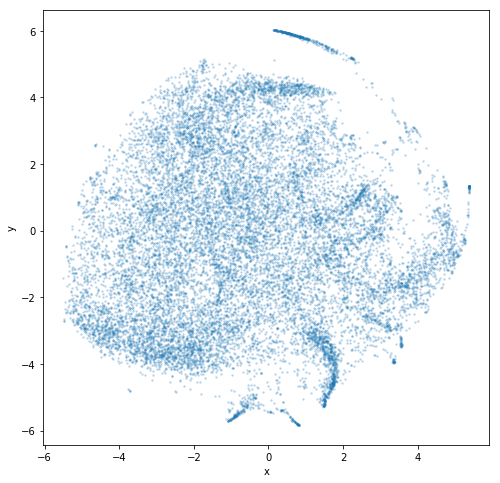

In [46]:
_ = coords_df.plot.scatter('x','y', figsize = (8,8), marker='.',s=10, alpha=0.2)

In [47]:
output_notebook()

Loading BokehJS ...

In [48]:
subset_df = coords_df.sample(n=5000)

In [49]:
p = figure(plot_width=600, plot_height = 600)
_ = p.text(x = subset_df.x, y=subset_df.y, text = subset_df.token)

In [51]:
show(p)